# DBSCAN

In [1]:
versioninfo()

Julia Version 1.11.4
Commit 8561cc3d68d (2025-03-10 11:36 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 8 × Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, skylake)
Threads: 8 default, 0 interactive, 4 GC (on 8 virtual cores)
Environment:
  LD_LIBRARY_PATH = /home/mhamdi/torch/install/lib:/home/mhamdi/torch/install/lib:/home/mhamdi/torch/install/lib:
  DYLD_LIBRARY_PATH = /home/mhamdi/torch/install/lib:/home/mhamdi/torch/install/lib:/home/mhamdi/torch/install/lib:
  JULIA_NUM_THREADS = 8


In [2]:
using Pkg; pkg"activate .."

  Activating project at `~/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-2`


In [3]:
using Plots

In [4]:
using DataFrames, MLJ

In [5]:
X, y = @load_iris

((sepal_length = [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9  …  6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], sepal_width = [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1  …  3.1, 3.1, 2.7, 3.2, 3.3, 3.0, 2.5, 3.0, 3.4, 3.0], petal_length = [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5  …  5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1], petal_width = [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1  …  2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2.0, 2.3, 1.8]), CategoricalArrays.CategoricalValue{String, UInt32}["setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa", "setosa"  …  "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica", "virginica"])

In [6]:
sc = Standardizer()

Standardizer(
  features = Symbol[], 
  ignore = false, 
  ordered_factor = false, 
  count = false)

In [7]:
machine(sc, X) |> fit! |> MLJ.transform

[ Info: Training machine(Standardizer(features = Symbol[], …), …).


(sepal_length = [-0.8976738791967661, -1.1392004834649532, -1.3807270877331412, -1.5014903898672358, -1.0184371813308597, -0.5353839727944832, -1.5014903898672358, -1.0184371813308597, -1.743016994135423, -1.1392004834649532  …  1.034538954948738, 1.2760655592169263, -0.05233076425810806, 1.1553022570828317, 1.034538954948738, 1.034538954948738, 0.5514857464123618, 0.79301235068055, 0.4307224442782682, 0.06843253787598655],
 sepal_width = [1.0286112808972345, -0.12454037930145959, 0.33672028477801846, 0.10608995273827944, 1.2592416129369735, 1.9511326090561896, 0.7979809488574955, 0.7979809488574955, -0.3551707113411986, 0.10608995273827944  …  0.10608995273827944, 0.10608995273827944, -0.8164313754206756, 0.33672028477801846, 0.5673506168177564, -0.12454037930145959, -1.2776920395001536, -0.12454037930145959, 0.7979809488574955, -0.12454037930145959],
 petal_length = [-1.3367940202882498, -1.3367940202882498, -1.3934698549528164, -1.280118185623683, -1.3367940202882498, -1.16676651629

In [8]:
y = coerce(y, Multiclass)
first(y, 5)

5-element CategoricalArrays.CategoricalArray{String,1,UInt32}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"

In [9]:
RandomForestClassifier = @load RandomForestClassifier pkg=DecisionTree

[ Info: For silent loading, specify `verbosity=0`. 


import MLJDecisionTreeInterface ✔


MLJDecisionTreeInterface.RandomForestClassifier

In [10]:
rfclf = RandomForestClassifier()

RandomForestClassifier(
  max_depth = -1, 
  min_samples_leaf = 1, 
  min_samples_split = 2, 
  min_purity_increase = 0.0, 
  n_subfeatures = -1, 
  n_trees = 100, 
  sampling_fraction = 0.7, 
  feature_importance = :impurity, 
  rng = Random.TaskLocalRNG())

In [11]:
r1 = range(rfclf, :min_purity_increase, lower=0.001, upper=1.0, scale=:log)

NumericRange(0.001 ≤ min_purity_increase ≤ 1.0; origin=0.5005, unit=0.4995; on log scale)

In [12]:
r2 = range(rfclf, :n_trees, lower=50, upper=200)

NumericRange(50 ≤ n_trees ≤ 200; origin=125.0, unit=75.0)

## Tuning using a GRID SEARCH

In [13]:
self_tuning_grid = TunedModel(model=rfclf, tuning=Grid(goal=30), resampling=CV(nfolds=5, shuffle=true), range=[r1, r2], measure=accuracy)

ProbabilisticTunedModel(
  model = RandomForestClassifier(
        max_depth = -1, 
        min_samples_leaf = 1, 
        min_samples_split = 2, 
        min_purity_increase = 0.0, 
        n_subfeatures = -1, 
        n_trees = 100, 
        sampling_fraction = 0.7, 
        feature_importance = :impurity, 
        rng = Random.TaskLocalRNG()), 
  tuning = Grid(
        goal = 30, 
        resolution = 10, 
        shuffle = true, 
        rng = Random.TaskLocalRNG()), 
  resampling = CV(
        nfolds = 5, 
        shuffle = true, 
        rng = Random.TaskLocalRNG()), 
  measure = Accuracy(), 
  weights = nothing, 
  class_weights = nothing, 
  operation = nothing, 
  range = MLJBase.NumericRange{T, MLJBase.Bounded, Symbol} where T[NumericRange(0.001 ≤ min_purity_increase ≤ 1.0; origin=0.5005, unit=0.4995; on log scale), NumericRange(50 ≤ n_trees ≤ 200; origin=125.0, unit=75.0)], 
  selection_heuristic = MLJTuning.NaiveSelection(nothing), 
  train_best = true, 
  repeats = 1, 
  n

In [14]:
mach_grid = machine(self_tuning_grid, X, y) |> fit!

[ Info: Training machine(ProbabilisticTunedModel(model = RandomForestClassifier(max_depth = -1, …), …), …).
[ Info: Attempting to evaluate 25 models.
Evaluating over 25 metamodels: 100%[=========================] Time: 0:00:17


trained Machine; does not cache data
  model: ProbabilisticTunedModel(model = RandomForestClassifier(max_depth = -1, …), …)
  args: 
    1:	Source @637 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @539 ⏎ AbstractVector{Multiclass{3}}


In [15]:
fitted_params(mach_grid)

(best_model = RandomForestClassifier(max_depth = -1, …),
 best_fitted_params = (forest = Ensemble of Decision Trees
Trees:      200
Avg Leaves: 3.915
Avg Depth:  2.67,),)

┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots ~/.julia/packages/Plots/3u4B6/src/args.jl:1584
┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots ~/.julia/packages/Plots/3u4B6/src/args.jl:1584


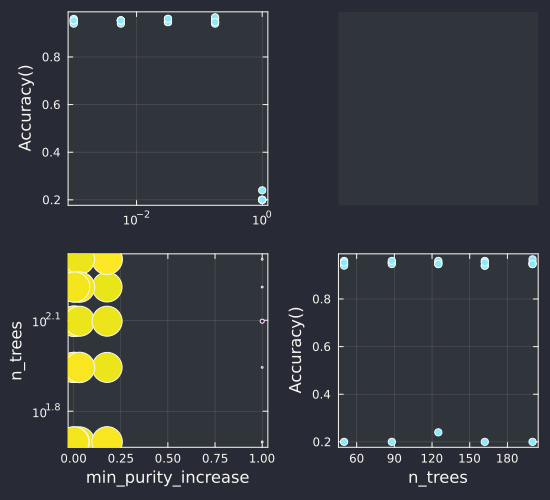

In [16]:
plot(mach_grid)

In [17]:
report(mach_grid).best_history_entry

(model = RandomForestClassifier(max_depth = -1, …),
 measure = StatisticalMeasuresBase.RobustMeasure{StatisticalMeasuresBase.FussyMeasure{StatisticalMeasuresBase.RobustMeasure{StatisticalMeasuresBase.Multimeasure{StatisticalMeasuresBase.SupportsMissingsMeasure{StatisticalMeasures.AccuracyOnScalars}, Nothing, StatisticalMeasuresBase.Mean, typeof(identity)}}, Nothing}}[Accuracy()],
 measurement = [0.9666666666666668],
 per_fold = [[0.9666666666666667, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333]],
 evaluation = CompactPerformanceEvaluation(0.967,),)

## Tuning using a RANDOM SEARCH 

In [18]:
self_tuning_random = TunedModel(model=rfclf, tuning=Grid(goal=30), resampling=CV(nfolds=5, shuffle=true), range=[r1, r2], measure=accuracy)

ProbabilisticTunedModel(
  model = RandomForestClassifier(
        max_depth = -1, 
        min_samples_leaf = 1, 
        min_samples_split = 2, 
        min_purity_increase = 0.0, 
        n_subfeatures = -1, 
        n_trees = 100, 
        sampling_fraction = 0.7, 
        feature_importance = :impurity, 
        rng = Random.TaskLocalRNG()), 
  tuning = Grid(
        goal = 30, 
        resolution = 10, 
        shuffle = true, 
        rng = Random.TaskLocalRNG()), 
  resampling = CV(
        nfolds = 5, 
        shuffle = true, 
        rng = Random.TaskLocalRNG()), 
  measure = Accuracy(), 
  weights = nothing, 
  class_weights = nothing, 
  operation = nothing, 
  range = MLJBase.NumericRange{T, MLJBase.Bounded, Symbol} where T[NumericRange(0.001 ≤ min_purity_increase ≤ 1.0; origin=0.5005, unit=0.4995; on log scale), NumericRange(50 ≤ n_trees ≤ 200; origin=125.0, unit=75.0)], 
  selection_heuristic = MLJTuning.NaiveSelection(nothing), 
  train_best = true, 
  repeats = 1, 
  n

In [19]:
mach_random = machine(self_tuning_random, X, y) |> fit!

[ Info: Training machine(ProbabilisticTunedModel(model = RandomForestClassifier(max_depth = -1, …), …), …).
[ Info: Attempting to evaluate 25 models.
Evaluating over 25 metamodels: 100%[=========================] Time: 0:00:00


trained Machine; does not cache data
  model: ProbabilisticTunedModel(model = RandomForestClassifier(max_depth = -1, …), …)
  args: 
    1:	Source @735 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @160 ⏎ AbstractVector{Multiclass{3}}


In [20]:
fitted_params(mach_random)

(best_model = RandomForestClassifier(max_depth = -1, …),
 best_fitted_params = (forest = Ensemble of Decision Trees
Trees:      162
Avg Leaves: 3.925925925925926
Avg Depth:  2.6728395061728394,),)

┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots ~/.julia/packages/Plots/3u4B6/src/args.jl:1584
┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots ~/.julia/packages/Plots/3u4B6/src/args.jl:1584


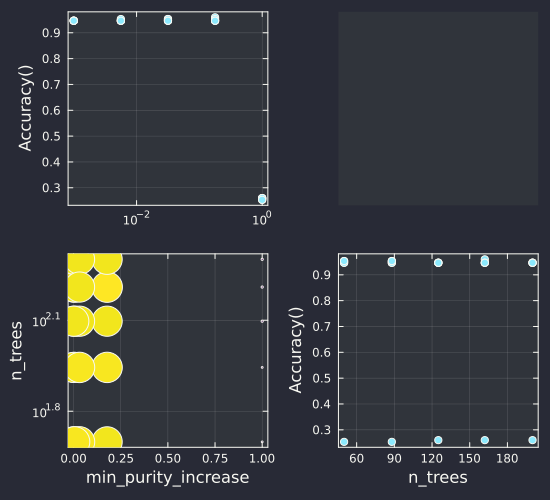

In [21]:
plot(mach_random)

In [22]:
report(mach_random).best_history_entry

(model = RandomForestClassifier(max_depth = -1, …),
 measure = StatisticalMeasuresBase.RobustMeasure{StatisticalMeasuresBase.FussyMeasure{StatisticalMeasuresBase.RobustMeasure{StatisticalMeasuresBase.Multimeasure{StatisticalMeasuresBase.SupportsMissingsMeasure{StatisticalMeasures.AccuracyOnScalars}, Nothing, StatisticalMeasuresBase.Mean, typeof(identity)}}, Nothing}}[Accuracy()],
 measurement = [0.96],
 per_fold = [[0.9666666666666667, 0.9666666666666667, 1.0, 0.9, 0.9666666666666667]],
 evaluation = CompactPerformanceEvaluation(0.96,),)